In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
df = pd.read_csv('car_price_prediction_dataset_v2.csv')

In [73]:
df.head()

,brand,fuel_type,transmission,owner_type,engine_cc,mileage_kmpl,horsepower,km_driven,maintenance_cost,accident_count,warranty_left_years,price
0,Kia,Hybrid,Automatic,First,1768.729314,11.263374,78.078250,64751.802503,14835.643938,0,0.647868,1366466.0
1,BMW,Diesel,Manual,Third,800.000000,14.555413,60.000000,22768.315058,45111.051374,0,0.145039,1649633.0
2,Audi,Diesel,Manual,Second,2418.103450,25.232158,69.149260,32054.435871,21399.709536,0,0.461421,1913404.0
3,Kia,Electric,Manual,Third,2099.774912,21.174922,122.947931,5000.000000,21032.003409,1,1.010487,1209745.0
4,Ford,Electric,Manual,First,962.481844,26.952128,60.000000,55392.257600,34765.841547,0,1.907755,1308796.0


In [74]:
df.tail()

,brand,fuel_type,transmission,owner_type,engine_cc,mileage_kmpl,horsepower,km_driven,maintenance_cost,accident_count,warranty_left_years,price
14995,Audi,Diesel,Automatic,Second,1451.906588,18.675785,77.948917,23835.320567,43187.342051,0,0.852052,2036850.0
14996,Ford,Petrol,Automatic,Third,1814.094139,18.856232,158.956457,44291.214898,10322.009885,1,3.094531,1166615.0
14997,Hyundai,Electric,Automatic,Second,999.854823,12.546674,222.554637,84420.273311,34974.035080,0,1.685561,1425932.0
14998,Toyota,Diesel,Automatic,Second,2132.840456,23.498005,79.729909,52640.909280,8077.909397,0,1.431729,1294020.0
14999,Audi,Petrol,Automatic,First,1322.103108,18.892776,126.785063,16521.731009,NaN,0,2.397067,2450863.0


In [75]:
df.shape

(15000, 12)

In [76]:
df.columns

Index(['brand', 'fuel_type', 'transmission', 'owner_type', 'engine_cc',
       'mileage_kmpl', 'horsepower', 'km_driven', 'maintenance_cost',
       'accident_count', 'warranty_left_years', 'price'],
      dtype='object')

In [77]:
df.describe()

,engine_cc,mileage_kmpl,horsepower,km_driven,maintenance_cost,accident_count,warranty_left_years,price
count,15000.000000,14625.000000,15000.000000,15000.000000,14625.000000,15000.000000,15000.000000,1.500000e+04
mean,1604.117681,18.033561,121.458929,60137.608870,25095.132713,0.312400,1.528930,1.488058e+06
std,390.028816,5.013706,37.681261,29294.668674,11384.282179,0.558832,0.945753,5.093316e+05
min,800.000000,5.000000,60.000000,5000.000000,5000.000000,0.000000,0.000000,4.816540e+05
25%,1326.597133,14.626689,93.270754,39192.523793,16869.289106,0.000000,0.828551,1.122783e+06
50%,1599.702534,17.995149,120.393858,60292.667073,24913.592146,0.000000,1.495820,1.299070e+06
75%,1870.342480,21.434736,147.362238,80201.242463,32893.113088,1.000000,2.159907,1.846600e+06
max,3319.543029,35.219629,276.643064,183010.268239,81333.672123,4.000000,5.000000,3.165543e+06


In [78]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
14995    False
14996    False
14997    False
14998    False
14999    False
Length: 15000, dtype: bool

In [79]:
df.isna().sum()

brand                    0
fuel_type                0
transmission             0
owner_type               0
engine_cc                0
mileage_kmpl           375
horsepower               0
km_driven                0
maintenance_cost       375
accident_count           0
warranty_left_years      0
price                    0
dtype: int64

In [80]:
(df.isnull().sum() / len(df)) * 100

brand                  0.0
fuel_type              0.0
transmission           0.0
owner_type             0.0
engine_cc              0.0
mileage_kmpl           2.5
horsepower             0.0
km_driven              0.0
maintenance_cost       2.5
accident_count         0.0
warranty_left_years    0.0
price                  0.0
dtype: float64

In [81]:
df["mileage_kmpl"].fillna(df["mileage_kmpl"].mean(), inplace=True)
df["maintenance_cost"].fillna(df["maintenance_cost"].mean(), inplace=True)

C:\Users\manaf\AppData\Local\Temp\ipykernel_15264\216891335.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["mileage_kmpl"].fillna(df["mileage_kmpl"].mean(), inplace=True)
C:\Users\manaf\AppData\Local\Temp\ipykernel_15264\216891335.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [82]:
# df = df.drop(['Car_ID'], axis=1)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   brand                15000 non-null  object 
 1   fuel_type            15000 non-null  object 
 2   transmission         15000 non-null  object 
 3   owner_type           15000 non-null  object 
 4   engine_cc            15000 non-null  float64
 5   mileage_kmpl         15000 non-null  float64
 6   horsepower           15000 non-null  float64
 7   km_driven            15000 non-null  float64
 8   maintenance_cost     15000 non-null  float64
 9   accident_count       15000 non-null  int64  
 10  warranty_left_years  15000 non-null  float64
 11  price                15000 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.4+ MB


In [84]:
for i in df.columns:
    print(i,df[i].unique())
    print('*'*100)

brand ['Kia' 'BMW' 'Audi' 'Ford' 'Honda' 'Hyundai' 'Toyota']
****************************************************************************************************
fuel_type ['Hybrid' 'Diesel' 'Electric' 'Petrol']
****************************************************************************************************
transmission ['Automatic' 'Manual']
****************************************************************************************************
owner_type ['First' 'Third' 'Second']
****************************************************************************************************
engine_cc [1768.72931447  800.         2418.10345003 ...  999.85482308 2132.84045576
 1322.10310846]
****************************************************************************************************
mileage_kmpl [11.26337445 14.55541268 25.23215832 ... 12.54667437 23.49800489
 18.89277639]
****************************************************************************************************
horsepower [ 78.

In [85]:
for i in df.columns:
    print(i,df[i].value_counts())
    print('*'*100)

brand brand
Audi       2196
Toyota     2180
Honda      2166
Kia        2147
BMW        2125
Ford       2093
Hyundai    2093
Name: count, dtype: int64
****************************************************************************************************
fuel_type fuel_type
Diesel      3801
Electric    3776
Hybrid      3715
Petrol      3708
Name: count, dtype: int64
****************************************************************************************************
transmission transmission
Manual       7531
Automatic    7469
Name: count, dtype: int64
****************************************************************************************************
owner_type owner_type
Second    5080
Third     5018
First     4902
Name: count, dtype: int64
****************************************************************************************************
engine_cc engine_cc
800.000000     308
1649.609626      1
1722.018275      1
1322.103108      1
1768.729314      1
              ... 
1978.655671      

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   brand                15000 non-null  object 
 1   fuel_type            15000 non-null  object 
 2   transmission         15000 non-null  object 
 3   owner_type           15000 non-null  object 
 4   engine_cc            15000 non-null  float64
 5   mileage_kmpl         15000 non-null  float64
 6   horsepower           15000 non-null  float64
 7   km_driven            15000 non-null  float64
 8   maintenance_cost     15000 non-null  float64
 9   accident_count       15000 non-null  int64  
 10  warranty_left_years  15000 non-null  float64
 11  price                15000 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.4+ MB


In [87]:
# brand ['Kia' 'BMW' 'Audi' 'Ford' 'Honda' 'Hyundai' 'Toyota']
# ****************************************************************************************************
# fuel_type ['Hybrid' 'Diesel' 'Electric' 'Petrol']
# ****************************************************************************************************
# transmission ['Automatic' 'Manual']
# ****************************************************************************************************
# owner_type ['First' 'Third' 'Second']

Encoding Categorical Columns

In [88]:
df['fuel_type'] = df['fuel_type'].replace({'Hybrid': 1,'Diesel': 2,'Electric': 3,'Petrol': 4})

C:\Users\manaf\AppData\Local\Temp\ipykernel_15264\3028366557.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['fuel_type'] = df['fuel_type'].replace({'Hybrid': 1,'Diesel': 2,'Electric': 3,'Petrol': 4})


In [89]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [90]:
ohe1 = OneHotEncoder(sparse_output=False)
df1 = ohe1.fit_transform(df[['brand']])

In [91]:
df1 = pd.DataFrame(df1,columns=ohe1.get_feature_names_out())
df = pd.concat([df,df1], axis=1)

In [92]:
le1 = LabelEncoder()
df['transmission'] = le1.fit_transform(df['transmission'])

In [93]:
le2 = LabelEncoder()
df['owner_type'] = le2.fit_transform(df['owner_type'])
# ohe2 = OneHotEncoder(sparse_output=False)
# df2 = ohe2.fit_transform(df[['Model']])

In [94]:
df.columns

Index(['brand', 'fuel_type', 'transmission', 'owner_type', 'engine_cc',
       'mileage_kmpl', 'horsepower', 'km_driven', 'maintenance_cost',
       'accident_count', 'warranty_left_years', 'price', 'brand_Audi',
       'brand_BMW', 'brand_Ford', 'brand_Honda', 'brand_Hyundai', 'brand_Kia',
       'brand_Toyota'],
      dtype='object')

In [95]:
# #drop columns
df = df.drop(['brand'], axis=1)

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

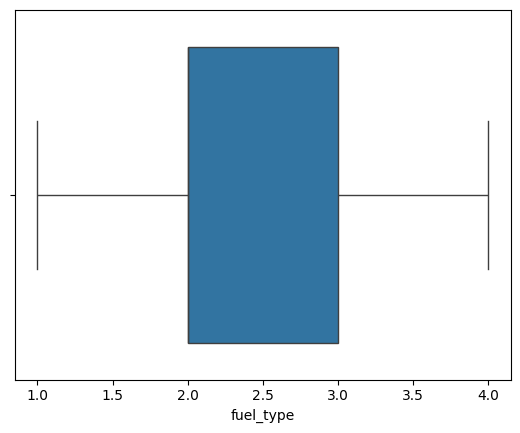

fuel_type ****************************************************************************************************


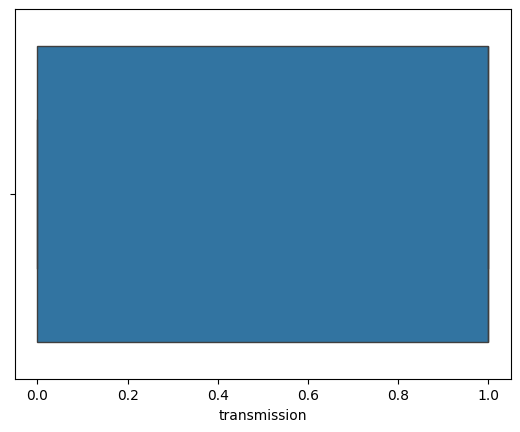

transmission ****************************************************************************************************


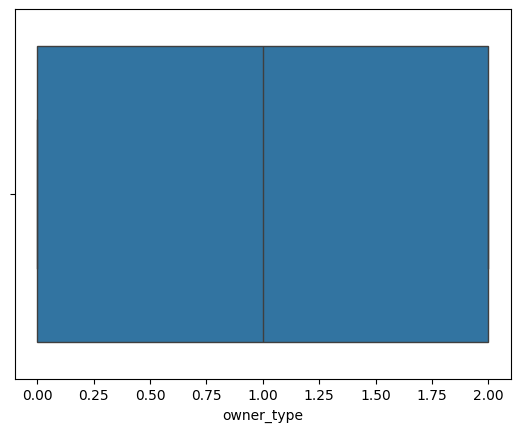

owner_type ****************************************************************************************************


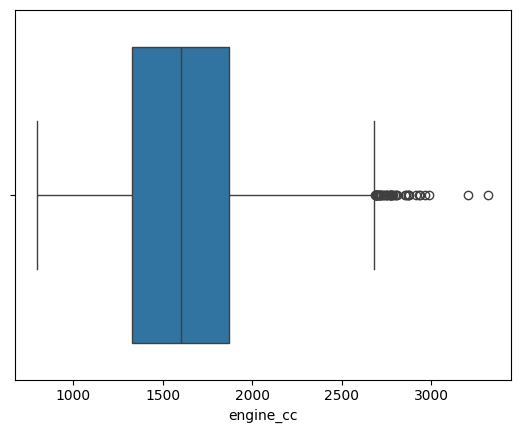

engine_cc ****************************************************************************************************


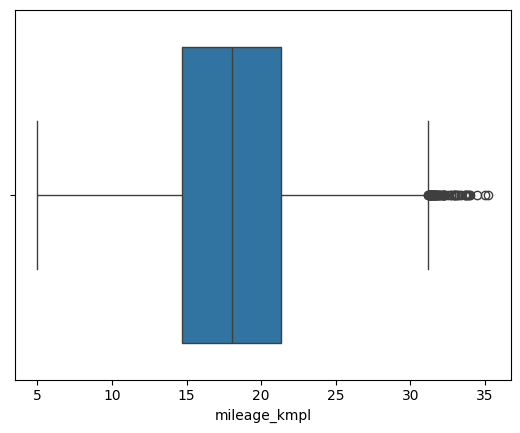

mileage_kmpl ****************************************************************************************************


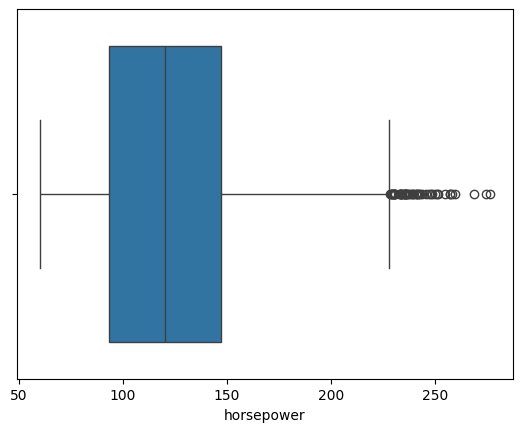

horsepower ****************************************************************************************************


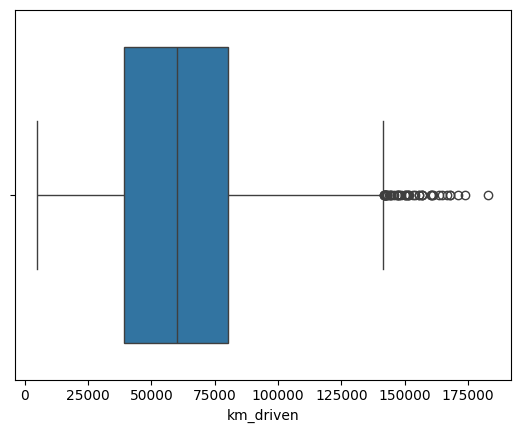

km_driven ****************************************************************************************************


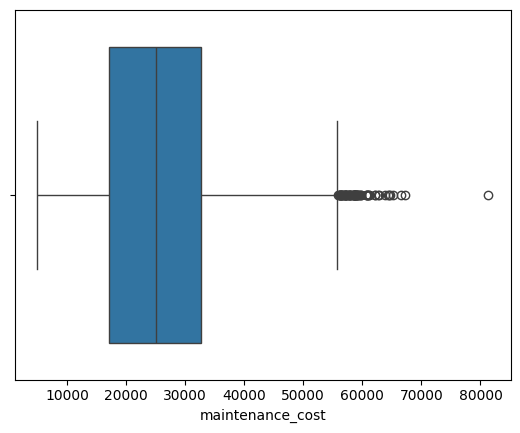

maintenance_cost ****************************************************************************************************


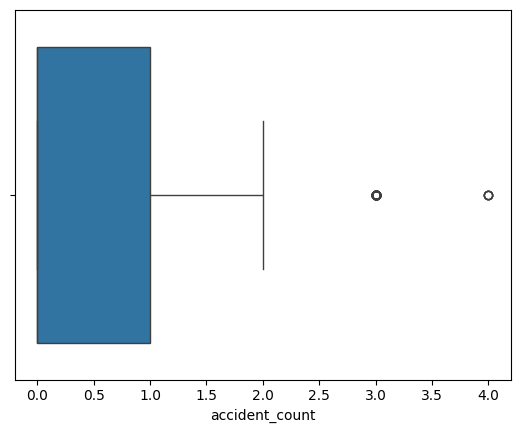

accident_count ****************************************************************************************************


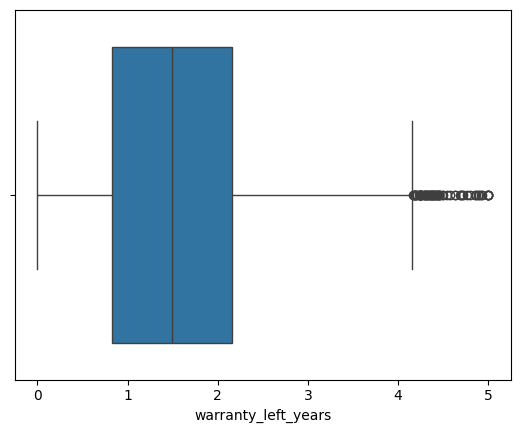

warranty_left_years ****************************************************************************************************


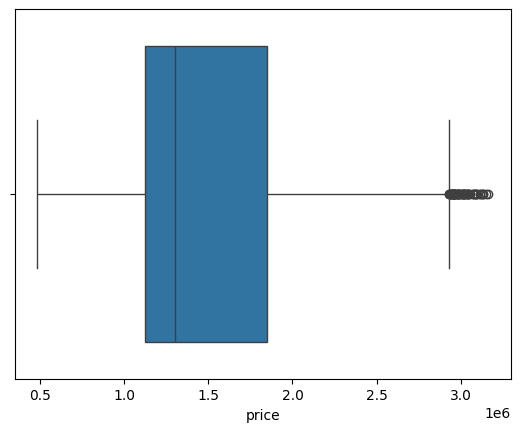

price ****************************************************************************************************


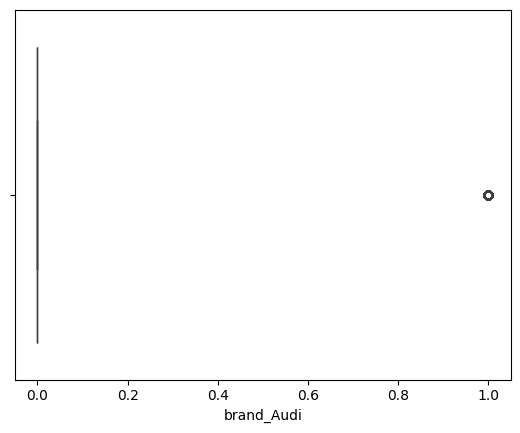

brand_Audi ****************************************************************************************************


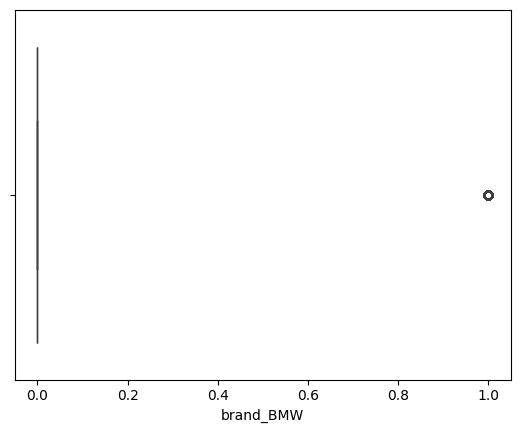

brand_BMW ****************************************************************************************************


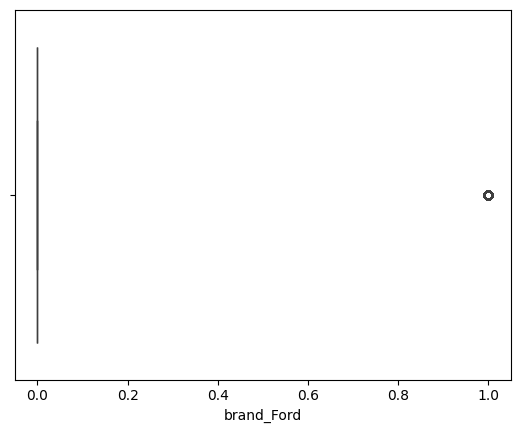

brand_Ford ****************************************************************************************************


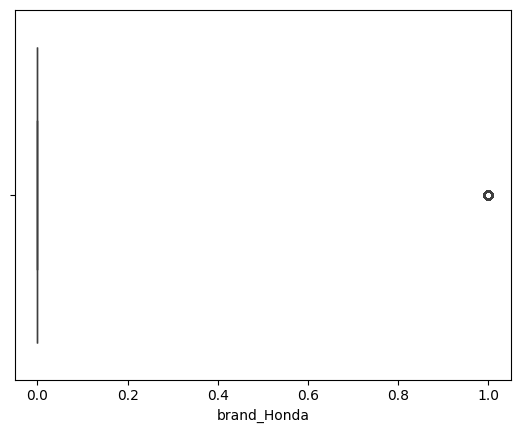

brand_Honda ****************************************************************************************************


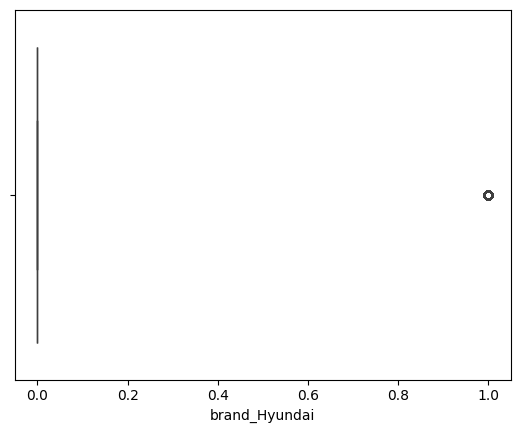

brand_Hyundai ****************************************************************************************************


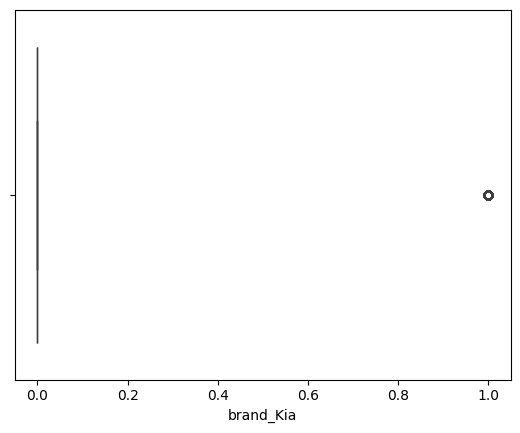

brand_Kia ****************************************************************************************************


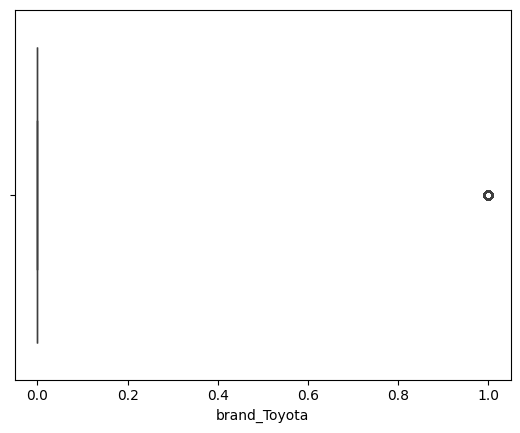

brand_Toyota ****************************************************************************************************


In [97]:
for i in df.columns:
    sns.boxplot(x=df[i])
    plt.show()
    print(i,'*'*100)

In [ ]:
# “Outliers were analyzed but not blindly removed, because in car price prediction,
#  high-priced luxury cars are valid data points.”

In [98]:
# num_cols = df.select_dtypes(include=["int64", "float64"]).columns

# # Remove outliers using IQR method
# for col in num_cols:
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3 - Q1

#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# print("Outliers removed successfully!")

In [99]:
df.corr()

,fuel_type,transmission,owner_type,engine_cc,mileage_kmpl,horsepower,km_driven,maintenance_cost,accident_count,warranty_left_years,price,brand_Audi,brand_BMW,brand_Ford,brand_Honda,brand_Hyundai,brand_Kia,brand_Toyota
fuel_type,1.000000,-0.004305,0.010174,-0.008119,0.004728,0.021250,0.000398,0.002633,0.015449,0.002746,-0.085163,0.005990,-0.014465,-0.003506,-0.004715,-0.002124,0.007316,0.011271
transmission,-0.004305,1.000000,-0.000695,0.003884,-0.000442,-0.000077,-0.009126,-0.009805,0.005325,-0.004744,-0.102841,0.010735,-0.001106,0.008148,-0.000181,-0.003011,-0.012540,-0.002083
owner_type,0.010174,-0.000695,1.000000,0.009757,0.005049,-0.002591,-0.004149,-0.007069,0.000258,0.010737,-0.206208,0.001396,-0.002218,-0.020391,0.007289,-0.003593,0.002200,0.014920
engine_cc,-0.008119,0.003884,0.009757,1.000000,0.003931,0.002198,0.000231,-0.008979,0.006087,0.008681,0.093251,-0.003585,0.007259,-0.003993,-0.009299,0.000045,0.010552,-0.000916
mileage_kmpl,0.004728,-0.000442,0.005049,0.003931,1.000000,-0.002182,0.008677,0.008523,-0.011834,0.010211,-0.008071,-0.012776,-0.007640,0.018078,-0.003138,0.003449,0.002216,0.000137
horsepower,0.021250,-0.000077,-0.002591,0.002198,-0.002182,1.000000,-0.008510,-0.001001,-0.001950,0.001645,0.112309,-0.014335,0.013676,0.013220,0.007767,-0.002028,-0.016182,-0.001824
km_driven,0.000398,-0.009126,-0.004149,0.000231,0.008677,-0.008510,1.000000,0.003372,-0.001988,0.005335,-0.110330,-0.003134,-0.002513,0.001986,-0.001770,0.008110,-0.000734,-0.001802
maintenance_cost,0.002633,-0.009805,-0.007069,-0.008979,0.008523,-0.001001,0.003372,1.000000,0.001759,0.011273,-0.011478,0.000683,0.002609,0.001328,0.003242,-0.002082,0.003771,-0.009506
accident_count,0.015449,0.005325,0.000258,0.006087,-0.011834,-0.001950,-0.001988,0.001759,1.000000,0.006212,-0.099005,0.007077,0.002446,0.009002,-0.008369,-0.002015,-0.004334,-0.003734
warranty_left_years,0.002746,-0.004744,0.010737,0.008681,0.010211,0.001645,0.005335,0.011273,0.006212,1.000000,0.114230,-0.002447,0.009483,-0.001474,0.007430,-0.014834,0.002719,-0.001007


In [100]:
df.dtypes

fuel_type                int64
transmission             int64
owner_type               int64
engine_cc              float64
mileage_kmpl           float64
horsepower             float64
km_driven              float64
maintenance_cost       float64
accident_count           int64
warranty_left_years    float64
price                  float64
brand_Audi             float64
brand_BMW              float64
brand_Ford             float64
brand_Honda            float64
brand_Hyundai          float64
brand_Kia              float64
brand_Toyota           float64
dtype: object

In [101]:
df.isnull().sum()/len(df)*100

fuel_type              0.0
transmission           0.0
owner_type             0.0
engine_cc              0.0
mileage_kmpl           0.0
horsepower             0.0
km_driven              0.0
maintenance_cost       0.0
accident_count         0.0
warranty_left_years    0.0
price                  0.0
brand_Audi             0.0
brand_BMW              0.0
brand_Ford             0.0
brand_Honda            0.0
brand_Hyundai          0.0
brand_Kia              0.0
brand_Toyota           0.0
dtype: float64

In [102]:
df.head()

,fuel_type,transmission,owner_type,engine_cc,mileage_kmpl,horsepower,km_driven,maintenance_cost,accident_count,warranty_left_years,price,brand_Audi,brand_BMW,brand_Ford,brand_Honda,brand_Hyundai,brand_Kia,brand_Toyota
0,1,0,0,1768.729314,11.263374,78.078250,64751.802503,14835.643938,0,0.647868,1366466.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,1,2,800.000000,14.555413,60.000000,22768.315058,45111.051374,0,0.145039,1649633.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2,1,1,2418.103450,25.232158,69.149260,32054.435871,21399.709536,0,0.461421,1913404.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1,2,2099.774912,21.174922,122.947931,5000.000000,21032.003409,1,1.010487,1209745.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,3,1,0,962.481844,26.952128,60.000000,55392.257600,34765.841547,0,1.907755,1308796.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


DATA VISUALIZATION

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

# sns.set_style("whitegrid")
# plt.rcParams["figure.figsize"] = (7, 5)

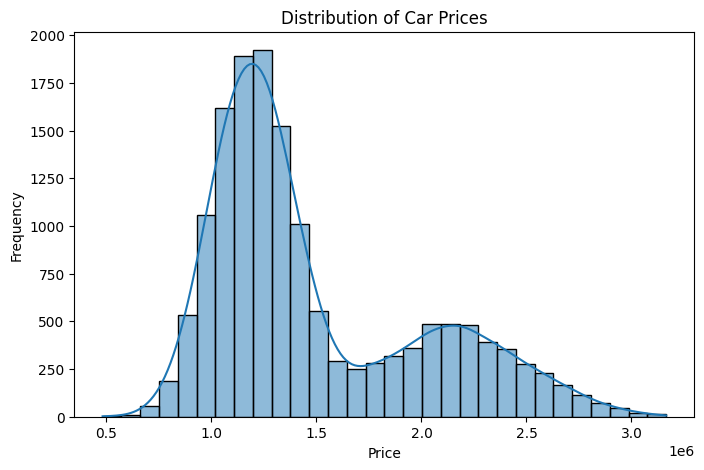

In [ ]:
#Distribution of Car Prices
plt.figure(figsize=(8, 5))
sns.histplot(df["price"], bins=30, kde=True)
plt.title("Distribution of Car Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

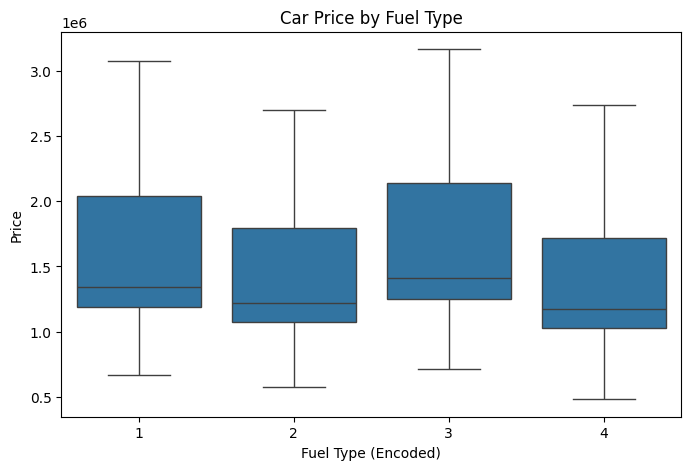

In [105]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["fuel_type"], y=df["price"])
plt.title("Car Price by Fuel Type")
plt.xlabel("Fuel Type (Encoded)")
plt.ylabel("Price")
plt.show()

C:\Users\manaf\AppData\Local\Temp\ipykernel_15264\3670630677.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


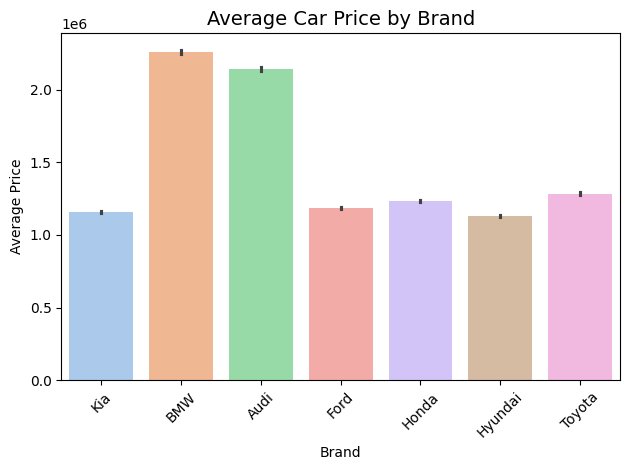

In [ ]:
#This shows which brand has higher average price.
#Average Car Price by Brand
plt.figure()
sns.barplot(
    x="brand",
    y="price",
    data=pd.read_csv("car_price_prediction_dataset_v2.csv"),
    palette="pastel"
)
plt.title("Average Car Price by Brand", fontsize=14)
plt.xlabel("Brand")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

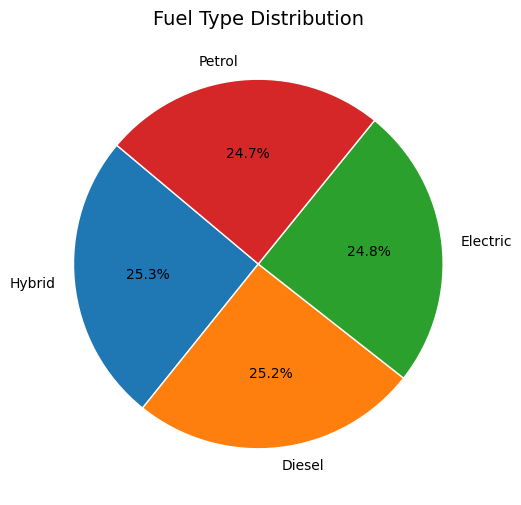

In [107]:
fuel_counts = df["fuel_type"].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(
    fuel_counts,
    labels=["Hybrid", "Diesel", "Electric", "Petrol"],
    autopct="%1.1f%%",
    startangle=140,
    wedgeprops={"edgecolor": "white"}
)
plt.title("Fuel Type Distribution", fontsize=14)
plt.show()

In [108]:
corr = df.corr()
num_df = df.select_dtypes(include=["int64", "float64"])



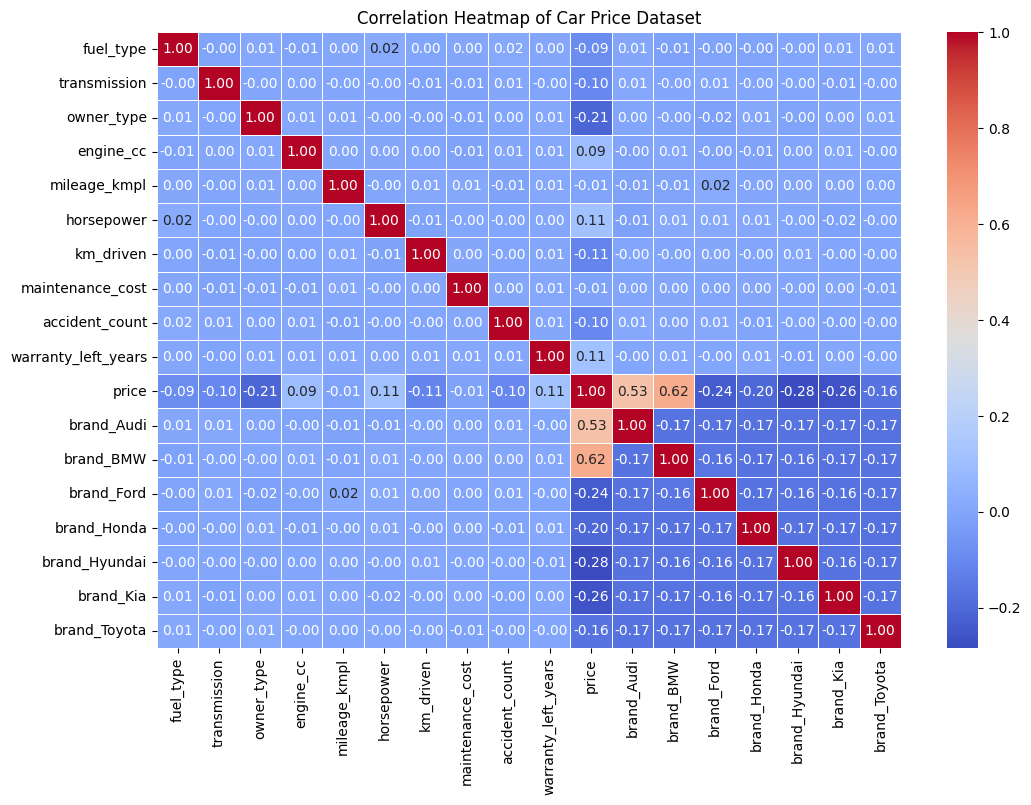

In [109]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Correlation Heatmap of Car Price Dataset")
plt.show()

In [110]:
#TRAIN TEST SPLIT

x = df.drop(['price'],axis=1)
y = df['price']

In [111]:
#select k-best
from sklearn.feature_selection import SelectKBest
sk=SelectKBest(k='all')
fit=sk.fit(x,y)
fit.scores_

array([1.04240817, 1.0117462 , 0.92755775, 1.24690102, 1.33371532,
       0.97769506, 0.96549023, 0.85110921, 1.18234262, 0.90673564,
       5.4623118 , 4.2507209 , 0.5945767 , 0.85913882, 1.3951246 ,
       0.64466189, 0.65296438])

In [112]:
x.columns

Index(['fuel_type', 'transmission', 'owner_type', 'engine_cc', 'mileage_kmpl',
       'horsepower', 'km_driven', 'maintenance_cost', 'accident_count',
       'warranty_left_years', 'brand_Audi', 'brand_BMW', 'brand_Ford',
       'brand_Honda', 'brand_Hyundai', 'brand_Kia', 'brand_Toyota'],
      dtype='object')

In [113]:
#standardisation
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [114]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20 , random_state= 0)

#Model Bilding (Regression Model)

In [115]:
#knn
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [116]:
y_pred_knn = knn.predict(x_test)       #prediction

In [117]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print('r2_score            :',r2_score(y_test,y_pred_knn))
print('mean_absolute_error :',mean_absolute_error(y_test,y_pred_knn))
print('mean_squared_error  :',mean_squared_error(y_test,y_pred_knn))

r2_score            : 0.9153646922759161
mean_absolute_error : 116218.61126666667
mean_squared_error  : 22043540454.827374


In [118]:
#Decision tree
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [119]:
y_pred_dtr = dtr.predict(x_test)

In [120]:
print('r2_score            :',r2_score(y_test,y_pred_dtr))
print('mean_absolute_error :',mean_absolute_error(y_test,y_pred_dtr))
print('mean_squared_error  :',mean_squared_error(y_test,y_pred_dtr))

r2_score            : 0.9417140020263035
mean_absolute_error : 96882.28633333334
mean_squared_error  : 15180777252.819666


In [121]:
y_pred_dtr2 = dtr.predict(x_train)
print("r2_score  :",r2_score(y_train,y_pred_dtr2))

r2_score  : 1.0


In [122]:
#random forest
from sklearn.ensemble import RandomForestRegressor
rdf = RandomForestRegressor(n_estimators=300,max_depth=None,random_state=42)
rdf.fit(x_train,y_train)

,n_estimators,300
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [123]:
y_pred_rdf = rdf.predict(x_test)

In [124]:
print('r2_score            :',r2_score(y_test,y_pred_rdf))
print('mean_absolute_error :',mean_absolute_error(y_test,y_pred_rdf))
print('mean_squared_error  :',mean_squared_error(y_test,y_pred_rdf))

r2_score            : 0.9749283579266937
mean_absolute_error : 63797.355675555555
mean_squared_error  : 6529990510.740611


In [125]:
y_pred_rdf2 = dtr.predict(x_train)
print("r2_score  :",r2_score(y_train,y_pred_rdf2))

r2_score  : 1.0


In [126]:
#linear regression
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [127]:
y_pred_linear = linear.predict(x_test)

In [128]:
print('r2_score            :',r2_score(y_test,y_pred_linear))
print('mean_absolute_error :',mean_absolute_error(y_test,y_pred_linear))
print('mean_squared_error  :',mean_squared_error(y_test,y_pred_linear))

r2_score            : 0.9199017604724106
mean_absolute_error : 114082.1469536833
mean_squared_error  : 20861846324.739433


In [129]:
y_pred_linear2 = linear.predict(x_train)
print('r2_score    :',r2_score(y_train,y_pred_linear2))

r2_score    : 0.920762602453532


In [130]:
#take linear regression model because its test and train score are best fit

In [132]:
# fit_intercept : 'True'

In [133]:

# help(ln)

In [134]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LinearRegression

# param_grid = {
#     "fit_intercept": [True, False],
#     "positive": [True, False]
# }

# grid = GridSearchCV(
#     LinearRegression(),
#     param_grid,
#     scoring="r2",
#     cv=5
# )

# grid.fit(x_train, y_train)

# print(grid.best_params_)


In [135]:
import pickle

In [136]:
pickle.dump(linear,open('linear_model.sav','wb'))

In [137]:
pickle.dump(sc,open('sc_model.sav','wb'))

In [138]:
pickle.dump(le1,open('le1_model.sav','wb'))

In [139]:
pickle.dump(le2,open('le2_model.sav','wb'))

In [140]:
pickle.dump(ohe1,open('ohe1_model.sav','wb'))